In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
file = 'train.csv'
pen = 'test.csv'

In [3]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

# TRAIN DATASET

In [4]:
train = pd.read_csv(file, encoding='ISO-8859-1')
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",?200,?50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",?100,?50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",?150,?50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",?250,?99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",?200,?99,3.2,521,235,65 minutes


In [5]:
train.shape

(11094, 9)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
Restaurant       11094 non-null object
Location         11094 non-null object
Cuisines         11094 non-null object
Average_Cost     11094 non-null object
Minimum_Order    11094 non-null object
Rating           11094 non-null object
Votes            11094 non-null object
Reviews          11094 non-null object
Delivery_Time    11094 non-null object
dtypes: object(9)
memory usage: 780.1+ KB


In [7]:
train.isnull().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
dtype: int64

# TEST DATASET

In [8]:
import chardet
with open(pen, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [9]:
test1 = pd.read_csv(pen, encoding='ISO-8859-1')
test1.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",?350,?50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",?100,?50,NEW,-,-
2,ID_4620,"Sector 1, Noida",Fast Food,?100,?50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",?200,?50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",?150,?50,2.9,38,14


In [10]:
test=test1.copy()

In [11]:
test.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",?350,?50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",?100,?50,NEW,-,-
2,ID_4620,"Sector 1, Noida",Fast Food,?100,?50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",?200,?50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",?150,?50,2.9,38,14


In [12]:
test.shape

(2774, 8)

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 8 columns):
Restaurant       2774 non-null object
Location         2774 non-null object
Cuisines         2774 non-null object
Average_Cost     2774 non-null object
Minimum_Order    2774 non-null object
Rating           2774 non-null object
Votes            2774 non-null object
Reviews          2774 non-null object
dtypes: object(8)
memory usage: 173.5+ KB


In [14]:
test.isnull().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
dtype: int64

## THIS IS A MULTICLASS PROBLEM STATEMENT. SO WE ARE GOING TO CONVERT THIS INTO LABEL FORM.

In [15]:
train.Delivery_Time.unique()

array(['30 minutes', '65 minutes', '45 minutes', '10 minutes',
       '20 minutes', '120 minutes', '80 minutes'], dtype=object)

In [16]:
train.Delivery_Time.value_counts()

30 minutes     7406
45 minutes     2665
65 minutes      923
120 minutes      62
20 minutes       20
80 minutes       14
10 minutes        4
Name: Delivery_Time, dtype: int64

In [17]:
label=train.Delivery_Time.value_counts().to_dict()
label={k:i for i,k in enumerate(label,0)}
label

{'30 minutes': 0,
 '45 minutes': 1,
 '65 minutes': 2,
 '120 minutes': 3,
 '20 minutes': 4,
 '80 minutes': 5,
 '10 minutes': 6}

In [18]:
train['Delivery_Time']=train['Delivery_Time'].map(label)
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",?200,?50,3.5,12,4,0
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",?100,?50,3.5,11,4,0
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",?150,?50,3.6,99,30,2
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",?250,?99,3.7,176,95,0
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",?200,?99,3.2,521,235,2


# DATA CLEANING

## TRAIN DATA CLEANING

In [19]:
train['Average_Cost'].unique()

array(['?200', '?100', '?150', '?250', '?650', '?350', '?800', '?50',
       '?400', '?600', '?300', '?750', '?450', '?550', '?1,000', '?500',
       '?900', '?1,200', '?950', '?850', '?700', '?1,150', 'for',
       '?1,100', '?1,400', '?2,050'], dtype=object)

In [20]:
train['Minimum_Order'].unique()

array(['?50', '?99', '?0', '?200', '?450', '?350', '?79', '?400', '?199',
       '?500', '?250', '?150', '?90', '?299', '?300', '?240', '?89',
       '?59'], dtype=object)

In [21]:
train['Rating'].unique()

array(['3.5', '3.6', '3.7', '3.2', '3.8', '4.0', '3.9', '4.2', '-', '2.8',
       '3.0', '3.3', '3.1', '4.7', '3.4', '4.1', 'NEW', '2.9', '4.6',
       '4.3', '2.6', '4.5', '4.4', '4.8', '2.4', '2.7', '2.5',
       'Opening Soon', '2.2', '4.9', '2.3', '2.1', 'Temporarily Closed'],
      dtype=object)

In [22]:
train['Average_Cost'] = train['Average_Cost'].replace('for', np.NaN)
train['Rating'] = train['Rating'].replace('NEW', np.NaN)
train['Rating'] = train['Rating'].replace('Opening Soon', np.NaN)
train['Rating'] = train['Rating'].replace('Temporarily Closed', np.NaN)
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",?200,?50,3.5,12,4,0
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",?100,?50,3.5,11,4,0
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",?150,?50,3.6,99,30,2
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",?250,?99,3.7,176,95,0
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",?200,?99,3.2,521,235,2


In [23]:
train.Rating.unique()

array(['3.5', '3.6', '3.7', '3.2', '3.8', '4.0', '3.9', '4.2', '-', '2.8',
       '3.0', '3.3', '3.1', '4.7', '3.4', '4.1', nan, '2.9', '4.6', '4.3',
       '2.6', '4.5', '4.4', '4.8', '2.4', '2.7', '2.5', '2.2', '4.9',
       '2.3', '2.1'], dtype=object)

In [24]:
train['Average_Cost'] = train['Average_Cost'].str.replace('?', '')
train['Average_Cost'] = train['Average_Cost'].str.replace(',', '')
train['Minimum_Order'] = train['Minimum_Order'].str.replace('?', '')
train['Rating'] = train['Rating'].replace('-', np.NaN)
train['Votes'] = train['Votes'].replace('-', np.NaN)
train['Reviews'] = train['Reviews'].replace('-', np.NaN)
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,0
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,0
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,2
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,0
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521,235,2


In [25]:
train['Minimum_Order'] = train['Minimum_Order'].replace('0', np.NaN)
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,0
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,0
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,2
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,0
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521,235,2


In [26]:
train['Average_Cost'].unique()

array(['200', '100', '150', '250', '650', '350', '800', '50', '400',
       '600', '300', '750', '450', '550', '1000', '500', '900', '1200',
       '950', '850', '700', '1150', nan, '1100', '1400', '2050'],
      dtype=object)

In [27]:
train['Minimum_Order'].unique()

array(['50', '99', nan, '200', '450', '350', '79', '400', '199', '500',
       '250', '150', '90', '299', '300', '240', '89', '59'], dtype=object)

In [28]:
train['Rating'].unique()

array(['3.5', '3.6', '3.7', '3.2', '3.8', '4.0', '3.9', '4.2', nan, '2.8',
       '3.0', '3.3', '3.1', '4.7', '3.4', '4.1', '2.9', '4.6', '4.3',
       '2.6', '4.5', '4.4', '4.8', '2.4', '2.7', '2.5', '2.2', '4.9',
       '2.3', '2.1'], dtype=object)

In [29]:
train['Votes'].unique()

array(['12', '11', '99', ..., '290', '698', '3700'], dtype=object)

In [30]:
train.isnull().sum()

Restaurant          0
Location            0
Cuisines            0
Average_Cost        1
Minimum_Order     158
Rating           1963
Votes            2074
Reviews          2312
Delivery_Time       0
dtype: int64

## TEST DATA CLEANING

In [31]:
test['Average_Cost'].unique()

array(['?350', '?100', '?200', '?150', '?300', '?50', '?250', '?500',
       '?650', '?400', '?550', '?450', '?600', '?750', '?850', '?1,000',
       '?700', '?800', '?1,200'], dtype=object)

In [32]:
test['Minimum_Order'].unique()

array(['?50', '?99', '?500', '?0', '?200', '?149', '?199', '?399', '?89'],
      dtype=object)

In [33]:
test['Rating'].unique()

array(['4.2', 'NEW', '3.6', '2.9', '3.4', '3.3', '3.8', '3.2', '3.1',
       '4.1', '3.9', '-', '3.7', '4.0', '4.3', '3.0', '3.5', '2.6', '2.8',
       '4.5', '2.7', '4.4', '2.1', '2.4', '4.7', '4.6', '2.5', '4.8',
       '2.3', 'Opening Soon'], dtype=object)

In [34]:
test['Rating'] = test['Rating'].replace('NEW', np.NaN)
test['Rating'] = test['Rating'].replace('Opening Soon', np.NaN)
test.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",?350,?50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",?100,?50,NaN,-,-
2,ID_4620,"Sector 1, Noida",Fast Food,?100,?50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",?200,?50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",?150,?50,2.9,38,14


In [35]:
test['Average_Cost'] = test['Average_Cost'].str.replace('?', '')
test['Average_Cost'] = test['Average_Cost'].str.replace(',', '')
test['Minimum_Order'] = test['Minimum_Order'].str.replace('?', '')
test['Rating'] = test['Rating'].replace('-', np.NaN)
test['Votes'] = test['Votes'].replace('-', np.NaN)
test['Reviews'] = test['Reviews'].replace('-', np.NaN)
test.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",350,50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",100,50,NaN,NaN,NaN
2,ID_4620,"Sector 1, Noida",Fast Food,100,50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",200,50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",150,50,2.9,38,14


In [36]:
test['Minimum_Order'] = test['Minimum_Order'].replace('0', np.NaN)
test.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",350,50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",100,50,NaN,NaN,NaN
2,ID_4620,"Sector 1, Noida",Fast Food,100,50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",200,50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",150,50,2.9,38,14


In [37]:
test.isnull().sum()

Restaurant         0
Location           0
Cuisines           0
Average_Cost       0
Minimum_Order     30
Rating           507
Votes            542
Reviews          593
dtype: int64

## HANDLING MISSING VALUES 

## TRAIN DATA

In [38]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,0
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,0
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,2
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,0
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521,235,2


In [39]:
train.isnull().sum()

Restaurant          0
Location            0
Cuisines            0
Average_Cost        1
Minimum_Order     158
Rating           1963
Votes            2074
Reviews          2312
Delivery_Time       0
dtype: int64

In [40]:
train.shape

(11094, 9)

In [41]:
col = ['Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews'] 

In [42]:
train['Average_Cost']=pd.to_numeric(train['Average_Cost'])
train['Minimum_Order'] = pd.to_numeric(train['Minimum_Order'])
train['Rating'] = pd.to_numeric(train['Rating'])
train['Votes'] = pd.to_numeric(train['Votes'])
train['Reviews'] = pd.to_numeric(train['Reviews'])

In [43]:
def impute_nan(train, feat):
    m=train[feat].median()
    train[feat]=train[feat].fillna(m)

for i in col:
    impute_nan(train, i)

In [44]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200.0,50.0,3.5,12.0,4.0,0
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100.0,50.0,3.5,11.0,4.0,0
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150.0,50.0,3.6,99.0,30.0,2
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250.0,99.0,3.7,176.0,95.0,0
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200.0,99.0,3.2,521.0,235.0,2


In [45]:
train.isnull().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
dtype: int64

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
Restaurant       11094 non-null object
Location         11094 non-null object
Cuisines         11094 non-null object
Average_Cost     11094 non-null float64
Minimum_Order    11094 non-null float64
Rating           11094 non-null float64
Votes            11094 non-null float64
Reviews          11094 non-null float64
Delivery_Time    11094 non-null int64
dtypes: float64(5), int64(1), object(3)
memory usage: 780.1+ KB


## TEST DATA

In [47]:
test.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",350,50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",100,50,NaN,NaN,NaN
2,ID_4620,"Sector 1, Noida",Fast Food,100,50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",200,50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",150,50,2.9,38,14


In [48]:
test.isnull().sum()

Restaurant         0
Location           0
Cuisines           0
Average_Cost       0
Minimum_Order     30
Rating           507
Votes            542
Reviews          593
dtype: int64

In [49]:
col = ['Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews'] 

In [50]:
test['Average_Cost']=pd.to_numeric(test['Average_Cost'])
test['Minimum_Order'] = pd.to_numeric(test['Minimum_Order'])
test['Rating'] = pd.to_numeric(test['Rating'])
test['Votes'] = pd.to_numeric(test['Votes'])
test['Reviews'] = pd.to_numeric(test['Reviews'])

In [51]:
def impute_nan(test, feat):
    m=test[feat].median()
    test[feat]=test[feat].fillna(m)

for i in col:
    impute_nan(test, i)

In [52]:
test.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",350,50.0,4.2,361.0,225.0
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",100,50.0,3.6,62.0,26.0
2,ID_4620,"Sector 1, Noida",Fast Food,100,50.0,3.6,36.0,16.0
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",200,50.0,3.6,66.0,33.0
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",150,50.0,2.9,38.0,14.0


In [53]:
test.isnull().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
dtype: int64

In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 8 columns):
Restaurant       2774 non-null object
Location         2774 non-null object
Cuisines         2774 non-null object
Average_Cost     2774 non-null int64
Minimum_Order    2774 non-null float64
Rating           2774 non-null float64
Votes            2774 non-null float64
Reviews          2774 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 173.5+ KB


# CORRELATION 

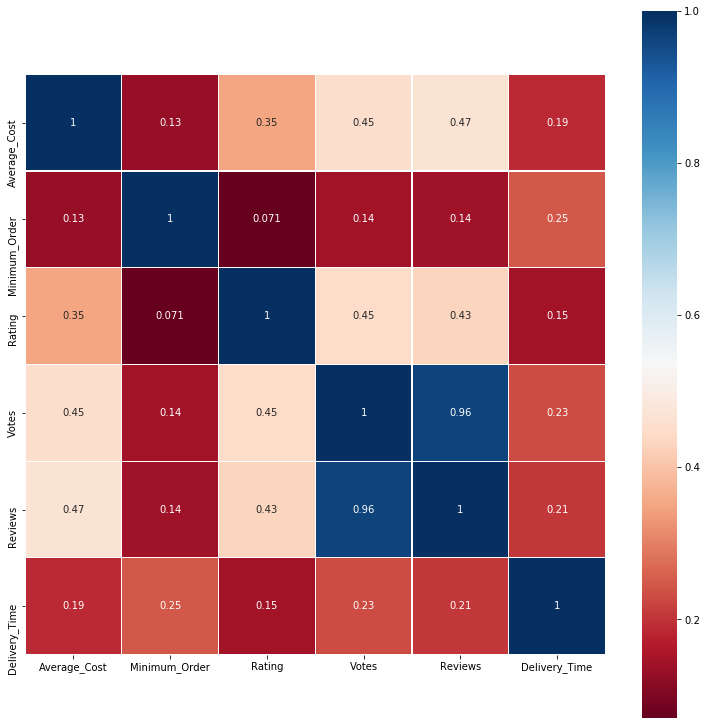

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
colormap = plt.cm.RdBu
plt.figure(figsize=(13,13))
sns.heatmap(train.corr(),linewidths=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

## FEATURE ENGINEERING

##  COMBINING BOTH TRAIN DATA AND TEST DATA

In [56]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200.0,50.0,3.5,12.0,4.0,0
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100.0,50.0,3.5,11.0,4.0,0
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150.0,50.0,3.6,99.0,30.0,2
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250.0,99.0,3.7,176.0,95.0,0
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200.0,99.0,3.2,521.0,235.0,2


In [57]:
test.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",350,50.0,4.2,361.0,225.0
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",100,50.0,3.6,62.0,26.0
2,ID_4620,"Sector 1, Noida",Fast Food,100,50.0,3.6,36.0,16.0
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",200,50.0,3.6,66.0,33.0
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",150,50.0,2.9,38.0,14.0


In [58]:
train.shape

(11094, 9)

In [59]:
final = pd.concat([train, test], axis=0)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [60]:
final.Delivery_Time

0       0.0
1       0.0
2       2.0
3       0.0
4       2.0
5       0.0
6       0.0
7       1.0
8       0.0
9       2.0
10      0.0
11      1.0
12      0.0
13      1.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      1.0
21      1.0
22      0.0
23      2.0
24      0.0
25      1.0
26      1.0
27      1.0
28      1.0
29      0.0
       ... 
2744    NaN
2745    NaN
2746    NaN
2747    NaN
2748    NaN
2749    NaN
2750    NaN
2751    NaN
2752    NaN
2753    NaN
2754    NaN
2755    NaN
2756    NaN
2757    NaN
2758    NaN
2759    NaN
2760    NaN
2761    NaN
2762    NaN
2763    NaN
2764    NaN
2765    NaN
2766    NaN
2767    NaN
2768    NaN
2769    NaN
2770    NaN
2771    NaN
2772    NaN
2773    NaN
Name: Delivery_Time, Length: 13868, dtype: float64

In [61]:
final.shape

(13868, 9)

In [62]:
final['Location'].unique()

array(['FTI College, Law College Road, Pune', 'Sector 3, Marathalli',
       'Mumbai Central', 'Sector 1, Noida',
       'Rmz Centennial, I Gate, Whitefield', 'Delhi University-GTB Nagar',
       'Yerawada, Pune, Maharashtra',
       'Delhi Administration Flats, Timarpur', 'Moulali, Kolkata',
       'Dockyard Road, Mumbai CST Area', 'Pune University',
       'Gora Bazar, Rajbari, North Dumdum, Kolkata',
       'D-Block, Sector 63, Noida', 'Sector 14, Noida',
       'Mico Layout, Stage 2, BTM Layout,Bangalore',
       'Laxman Vihar Industrial Area, Sector 3A, Gurgoan',
       'Tiretti, Kolkata', 'Sandhurst Road, Mumbai CST Area',
       'MG Road, Pune', 'Hyderabad Public School, Begumpet', 'Majestic',
       'Chandni Chowk, Kolkata', 'Delhi High Court, India Gate',
       'Chatta Bazaar, Malakpet, Hyderabad', 'Sector 63A,Gurgaon',
       'Delhi Cantt.', 'Tejas Nagar Colony, Wadala West, Mumbai',
       'Babarpur, New Delhi, Delhi', 'Nathan Road, Mangaldas Road, Pune',
       'Panjetan C

In [63]:
final.head()

,Average_Cost,Cuisines,Delivery_Time,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes
0,200.0,"Fast Food, Rolls, Burger, Salad, Wraps",0.0,"FTI College, Law College Road, Pune",50.0,3.5,ID_6321,4.0,12.0
1,100.0,"Ice Cream, Desserts",0.0,"Sector 3, Marathalli",50.0,3.5,ID_2882,4.0,11.0
2,150.0,"Italian, Street Food, Fast Food",2.0,Mumbai Central,50.0,3.6,ID_1595,30.0,99.0
3,250.0,"Mughlai, North Indian, Chinese",0.0,"Sector 1, Noida",99.0,3.7,ID_5929,95.0,176.0
4,200.0,"Cafe, Beverages",2.0,"Rmz Centennial, I Gate, Whitefield",99.0,3.2,ID_6123,235.0,521.0


In [64]:
Mean_encode = final.groupby(['Restaurant'])['Delivery_Time'].mean().to_dict()  
final['Restaurant']=final['Restaurant'].map(Mean_encode)
final.head()

,Average_Cost,Cuisines,Delivery_Time,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes
0,200.0,"Fast Food, Rolls, Burger, Salad, Wraps",0.0,"FTI College, Law College Road, Pune",50.0,3.5,0.0,4.0,12.0
1,100.0,"Ice Cream, Desserts",0.0,"Sector 3, Marathalli",50.0,3.5,0.0,4.0,11.0
2,150.0,"Italian, Street Food, Fast Food",2.0,Mumbai Central,50.0,3.6,2.0,30.0,99.0
3,250.0,"Mughlai, North Indian, Chinese",0.0,"Sector 1, Noida",99.0,3.7,0.0,95.0,176.0
4,200.0,"Cafe, Beverages",2.0,"Rmz Centennial, I Gate, Whitefield",99.0,3.2,2.0,235.0,521.0


In [65]:
Mean_encode = final.groupby(['Cuisines'])['Delivery_Time'].mean().to_dict()  
final['Cuisines']=final['Cuisines'].map(Mean_encode)
final.head()

,Average_Cost,Cuisines,Delivery_Time,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes
0,200.0,0.000000,0.0,"FTI College, Law College Road, Pune",50.0,3.5,0.0,4.0,12.0
1,100.0,0.278689,0.0,"Sector 3, Marathalli",50.0,3.5,0.0,4.0,11.0
2,150.0,1.333333,2.0,Mumbai Central,50.0,3.6,2.0,30.0,99.0
3,250.0,0.812500,0.0,"Sector 1, Noida",99.0,3.7,0.0,95.0,176.0
4,200.0,0.357143,2.0,"Rmz Centennial, I Gate, Whitefield",99.0,3.2,2.0,235.0,521.0


In [66]:
Mean_encode = final.groupby(['Location'])['Delivery_Time'].mean().to_dict()  
final['Location']=final['Location'].map(Mean_encode)
final.head()

,Average_Cost,Cuisines,Delivery_Time,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes
0,200.0,0.000000,0.0,0.258562,50.0,3.5,0.0,4.0,12.0
1,100.0,0.278689,0.0,0.459016,50.0,3.5,0.0,4.0,11.0
2,150.0,1.333333,2.0,0.540305,50.0,3.6,2.0,30.0,99.0
3,250.0,0.812500,0.0,0.509482,99.0,3.7,0.0,95.0,176.0
4,200.0,0.357143,2.0,0.518600,99.0,3.2,2.0,235.0,521.0


In [67]:
#final.drop(['Location', 'Votes', 'Minimum_Order'], axis=1, inplace=True)
#final.head()

In [68]:
df=final.loc[:,final.columns!='Delivery_Time']
df['Delivery_Time']=final['Delivery_Time']
df.head()

,Average_Cost,Cuisines,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes,Delivery_Time
0,200.0,0.000000,0.258562,50.0,3.5,0.0,4.0,12.0,0.0
1,100.0,0.278689,0.459016,50.0,3.5,0.0,4.0,11.0,0.0
2,150.0,1.333333,0.540305,50.0,3.6,2.0,30.0,99.0,2.0
3,250.0,0.812500,0.509482,99.0,3.7,0.0,95.0,176.0,0.0
4,200.0,0.357143,0.518600,99.0,3.2,2.0,235.0,521.0,2.0


In [69]:
final=df
final.head()

,Average_Cost,Cuisines,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes,Delivery_Time
0,200.0,0.000000,0.258562,50.0,3.5,0.0,4.0,12.0,0.0
1,100.0,0.278689,0.459016,50.0,3.5,0.0,4.0,11.0,0.0
2,150.0,1.333333,0.540305,50.0,3.6,2.0,30.0,99.0,2.0
3,250.0,0.812500,0.509482,99.0,3.7,0.0,95.0,176.0,0.0
4,200.0,0.357143,0.518600,99.0,3.2,2.0,235.0,521.0,2.0


In [70]:
train=final.iloc[:11094,:]
test=final.iloc[11094:,:]

In [71]:
train.head()

,Average_Cost,Cuisines,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes,Delivery_Time
0,200.0,0.000000,0.258562,50.0,3.5,0.0,4.0,12.0,0.0
1,100.0,0.278689,0.459016,50.0,3.5,0.0,4.0,11.0,0.0
2,150.0,1.333333,0.540305,50.0,3.6,2.0,30.0,99.0,2.0
3,250.0,0.812500,0.509482,99.0,3.7,0.0,95.0,176.0,0.0
4,200.0,0.357143,0.518600,99.0,3.2,2.0,235.0,521.0,2.0


In [72]:
test.head()

,Average_Cost,Cuisines,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes,Delivery_Time
0,350.0,NaN,0.402323,50.0,4.2,NaN,225.0,361.0,NaN
1,100.0,0.437500,0.402323,50.0,3.6,NaN,26.0,62.0,NaN
2,100.0,0.260369,0.509482,50.0,3.6,0.0,16.0,36.0,NaN
3,200.0,NaN,0.113475,50.0,3.6,NaN,33.0,66.0,NaN
4,150.0,0.250000,0.509482,50.0,2.9,0.0,14.0,38.0,NaN


i am getting nan values in test data in both restaurant and cuisines(these data both id and cuisines are not present in training data). So i am taking mean value of test data (both restaurant and cuisines).

In [73]:
col = ['Cuisines', 'Restaurant']

In [74]:
def impute_nan(test, feat):
    m=test[feat].mean()
    test[feat]=test[feat].fillna(m)

for i in col:
    impute_nan(test, i)
test.head()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Average_Cost,Cuisines,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes,Delivery_Time
0,350.0,0.430020,0.402323,50.0,4.2,0.465233,225.0,361.0,NaN
1,100.0,0.437500,0.402323,50.0,3.6,0.465233,26.0,62.0,NaN
2,100.0,0.260369,0.509482,50.0,3.6,0.000000,16.0,36.0,NaN
3,200.0,0.430020,0.113475,50.0,3.6,0.465233,33.0,66.0,NaN
4,150.0,0.250000,0.509482,50.0,2.9,0.000000,14.0,38.0,NaN


In [75]:
train.shape

(11094, 9)

In [76]:
test.drop(['Delivery_Time'],axis=1,inplace=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [77]:
test.head()

,Average_Cost,Cuisines,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes
0,350.0,0.430020,0.402323,50.0,4.2,0.465233,225.0,361.0
1,100.0,0.437500,0.402323,50.0,3.6,0.465233,26.0,62.0
2,100.0,0.260369,0.509482,50.0,3.6,0.000000,16.0,36.0
3,200.0,0.430020,0.113475,50.0,3.6,0.465233,33.0,66.0
4,150.0,0.250000,0.509482,50.0,2.9,0.000000,14.0,38.0


## TRAIN TEST SPLIT

In [78]:
x=train.drop(['Delivery_Time'], axis = 1)
y=train['Delivery_Time']
x.shape, y.shape

((11094, 8), (11094,))

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state = 3)

## RANDOM FOREST CLASSIFIER

In [80]:
params={'n_estimators': [100, 200, 300, 400, 500, 600, 800],
        'max_depth' : [3, 4, 5, 6, 8, 10, 12, 15, 20, 25, 30],
         'min_samples_leaf' : [1, 3, 5, 7],
        'max_features' : [1, 2, 3, 4, 5], 
        'criterion' : ['gini', 'entropy']}

In [81]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [82]:
clf=RandomForestClassifier()

In [83]:
random_search=RandomizedSearchCV(clf, param_distributions=params, n_iter=5, n_jobs=-1, cv=5, verbose=3)
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=300, min_samples_leaf=5, max_features=5, max_depth=12, criterion=entropy 


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, min_samples_leaf=5, max_features=5, max_depth=12, criterion=entropy, score=0.948, total=   4.2s
[CV] n_estimators=300, min_samples_leaf=5, max_features=5, max_depth=12, criterion=entropy 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV]  n_estimators=300, min_samples_leaf=5, max_features=5, max_depth=12, criterion=entropy, score=0.962, total=   4.0s
[CV] n_estimators=300, min_samples_leaf=5, max_features=5, max_depth=12, criterion=entropy 


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    8.2s remaining:    0.0s


[CV]  n_estimators=300, min_samples_leaf=5, max_features=5, max_depth=12, criterion=entropy, score=0.960, total=   4.5s
[CV] n_estimators=300, min_samples_leaf=5, max_features=5, max_depth=12, criterion=entropy 
[CV]  n_estimators=300, min_samples_leaf=5, max_features=5, max_depth=12, criterion=entropy, score=0.957, total=   4.6s
[CV] n_estimators=300, min_samples_leaf=5, max_features=5, max_depth=12, criterion=entropy 
[CV]  n_estimators=300, min_samples_leaf=5, max_features=5, max_depth=12, criterion=entropy, score=0.964, total=   4.4s
[CV] n_estimators=500, min_samples_leaf=7, max_features=2, max_depth=30, criterion=entropy 
[CV]  n_estimators=500, min_samples_leaf=7, max_features=2, max_depth=30, criterion=entropy, score=0.940, total=   4.4s
[CV] n_estimators=500, min_samples_leaf=7, max_features=2, max_depth=30, criterion=entropy 
[CV]  n_estimators=500, min_samples_leaf=7, max_features=2, max_depth=30, criterion=entropy, score=0.956, total=   4.4s
[CV] n_estimators=500, min_sampl

[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [84]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=12, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
random_search.best_params_

{'n_estimators': 300,
 'min_samples_leaf': 5,
 'max_features': 5,
 'max_depth': 12,
 'criterion': 'entropy'}

In [86]:
clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [87]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf, x_train, y_train, cv=10)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [88]:
score

array([0.95617978, 0.94600675, 0.96283784, 0.96959459, 0.96734234,
       0.95720721, 0.95941375, 0.95485327, 0.96726862, 0.96158192])

In [89]:
score.mean()

0.9602286077713453

In [90]:
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [91]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred)

0.9598918431726002

In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1477,   32,    7,    0,    0,    0,    0],
       [  14,  497,    5,    0,    0,    0,    0],
       [   5,   16,  140,    1,    0,    0,    0],
       [   0,    0,    1,   14,    0,    0,    0],
       [   0,    0,    1,    2,    1,    0,    0],
       [   0,    0,    2,    1,    0,    1,    0],
       [   0,    0,    2,    0,    0,    0,    0]])

## PREDICTING TEST DATA OUTPUT

In [93]:
Delivery_Time = clf.predict(test)
Delivery_Time

array([0., 0., 0., ..., 1., 1., 2.])

In [94]:
g = {'30 minutes': 0,
 '45 minutes': 1,
 '65 minutes': 2,
 '120 minutes': 3,
 '20 minutes': 4,
 '80 minutes': 5,
 '10 minutes': 6}

In [95]:
test1.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",?350,?50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",?100,?50,NEW,-,-
2,ID_4620,"Sector 1, Noida",Fast Food,?100,?50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",?200,?50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",?150,?50,2.9,38,14


In [96]:
test1['Delivery_Time'] = Delivery_Time

In [97]:
test1.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",?350,?50,4.2,361,225,0.0
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",?100,?50,NEW,-,-,0.0
2,ID_4620,"Sector 1, Noida",Fast Food,?100,?50,3.6,36,16,0.0
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",?200,?50,3.6,66,33,0.0
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",?150,?50,2.9,38,14,0.0


In [98]:
g = {0: '30 minutes', 1: '45 minutes', 2: '65 minutes', 3: '120 minutes', 4 : '20 minutes', 5 : '80 minutes',  6: '10 minutes'}

In [99]:
test1['Delivery_Time']=test1['Delivery_Time'].map(g)
test1.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",?350,?50,4.2,361,225,30 minutes
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",?100,?50,NEW,-,-,30 minutes
2,ID_4620,"Sector 1, Noida",Fast Food,?100,?50,3.6,36,16,30 minutes
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",?200,?50,3.6,66,33,30 minutes
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",?150,?50,2.9,38,14,30 minutes


In [100]:
test1.Delivery_Time.value_counts()

30 minutes     1880
45 minutes      758
65 minutes      128
120 minutes       6
20 minutes        1
80 minutes        1
Name: Delivery_Time, dtype: int64

In [101]:
test1.Delivery_Time.unique()

array(['30 minutes', '45 minutes', '65 minutes', '120 minutes',
       '20 minutes', '80 minutes'], dtype=object)

In [102]:
test1.to_csv('RANDOM FOREST TEST DATA.csv')